<a href="https://colab.research.google.com/github/Giraldo0712/TAM_2025_2/blob/main/Ejercicios_cuaderno_8_Reduccion_de_dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

- Presente el problema de optimización de PCA como un algoritmo generativo (reconstrucción o filtrado de datos), y compare el problema de optimización desde el punto de vista generativo vs. preservación de la varianza. (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)).



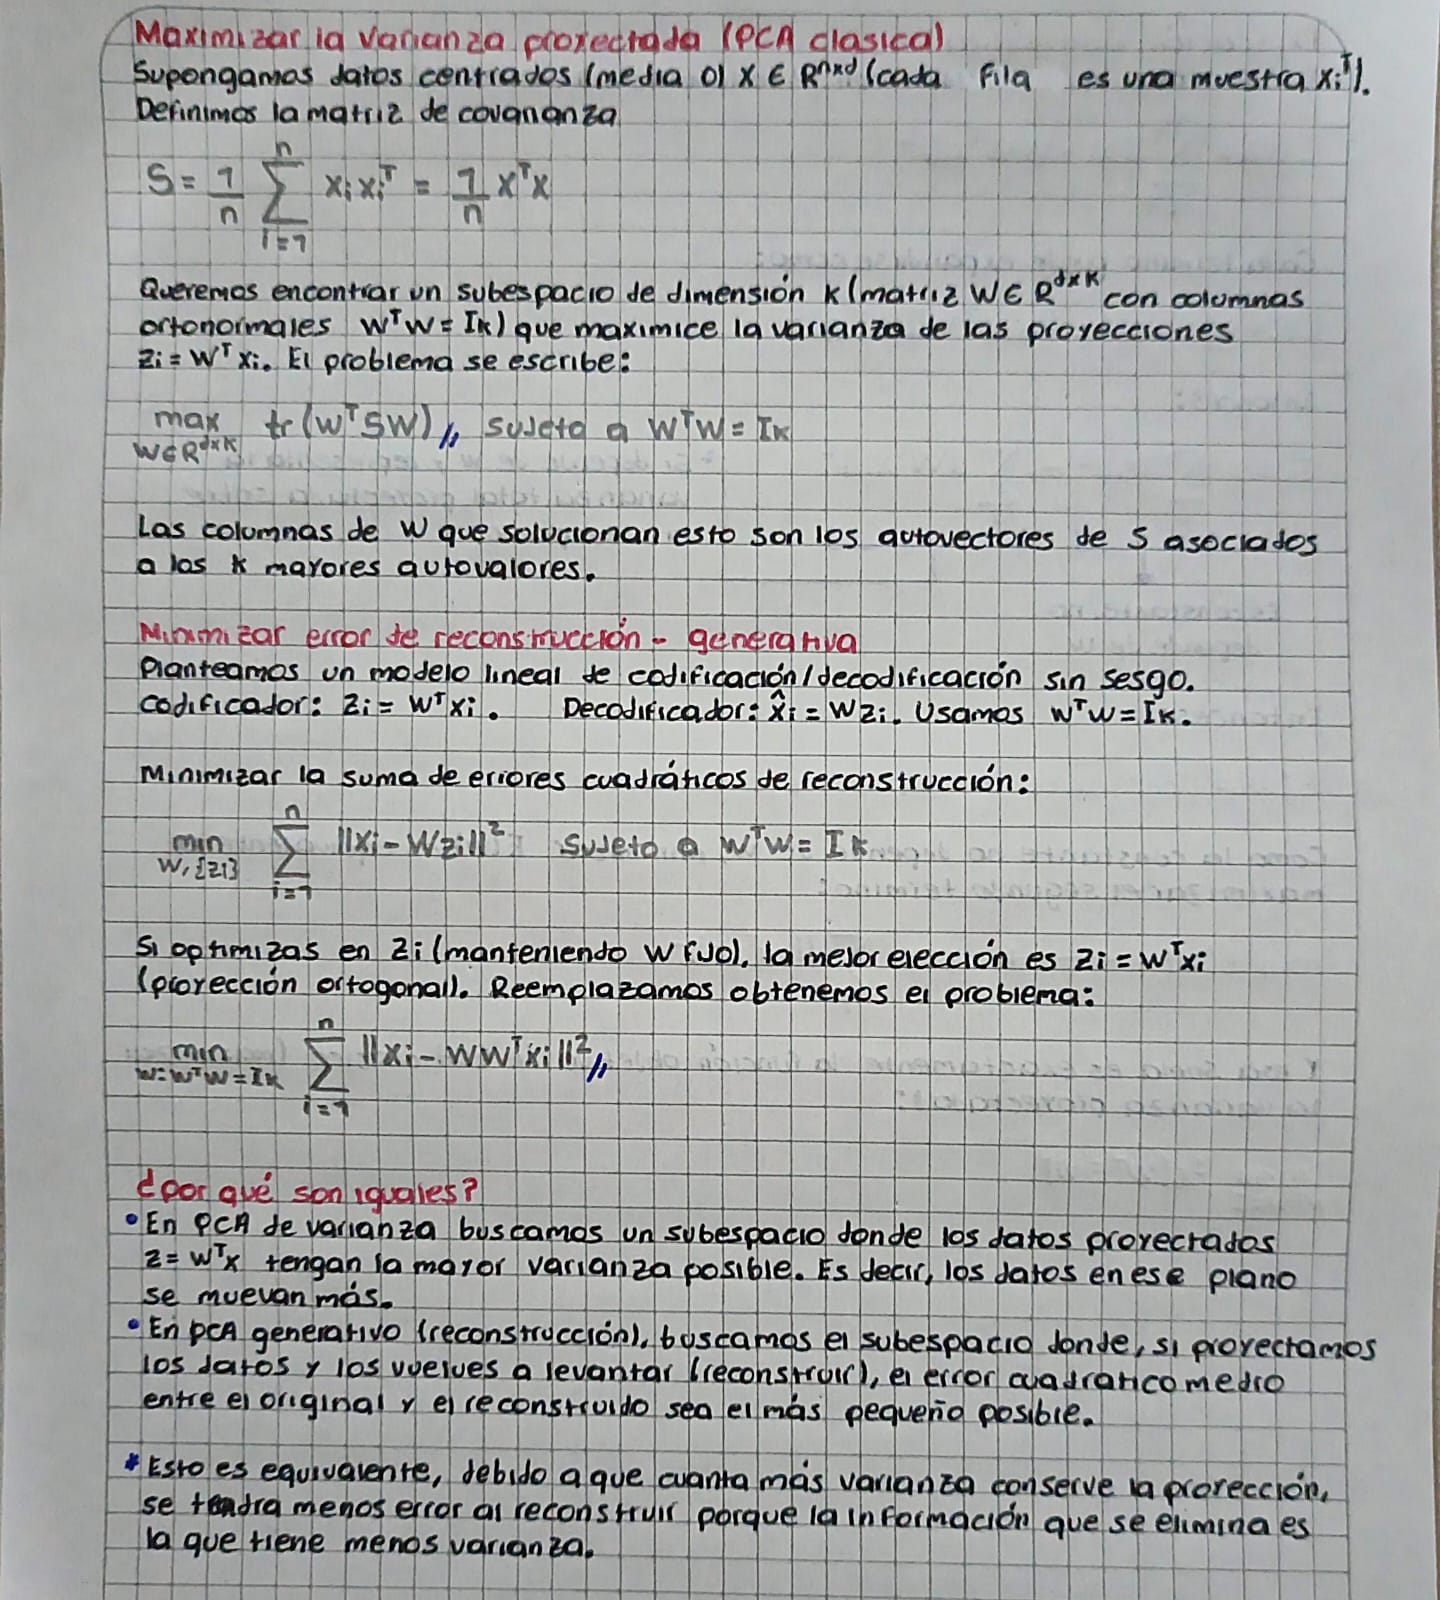

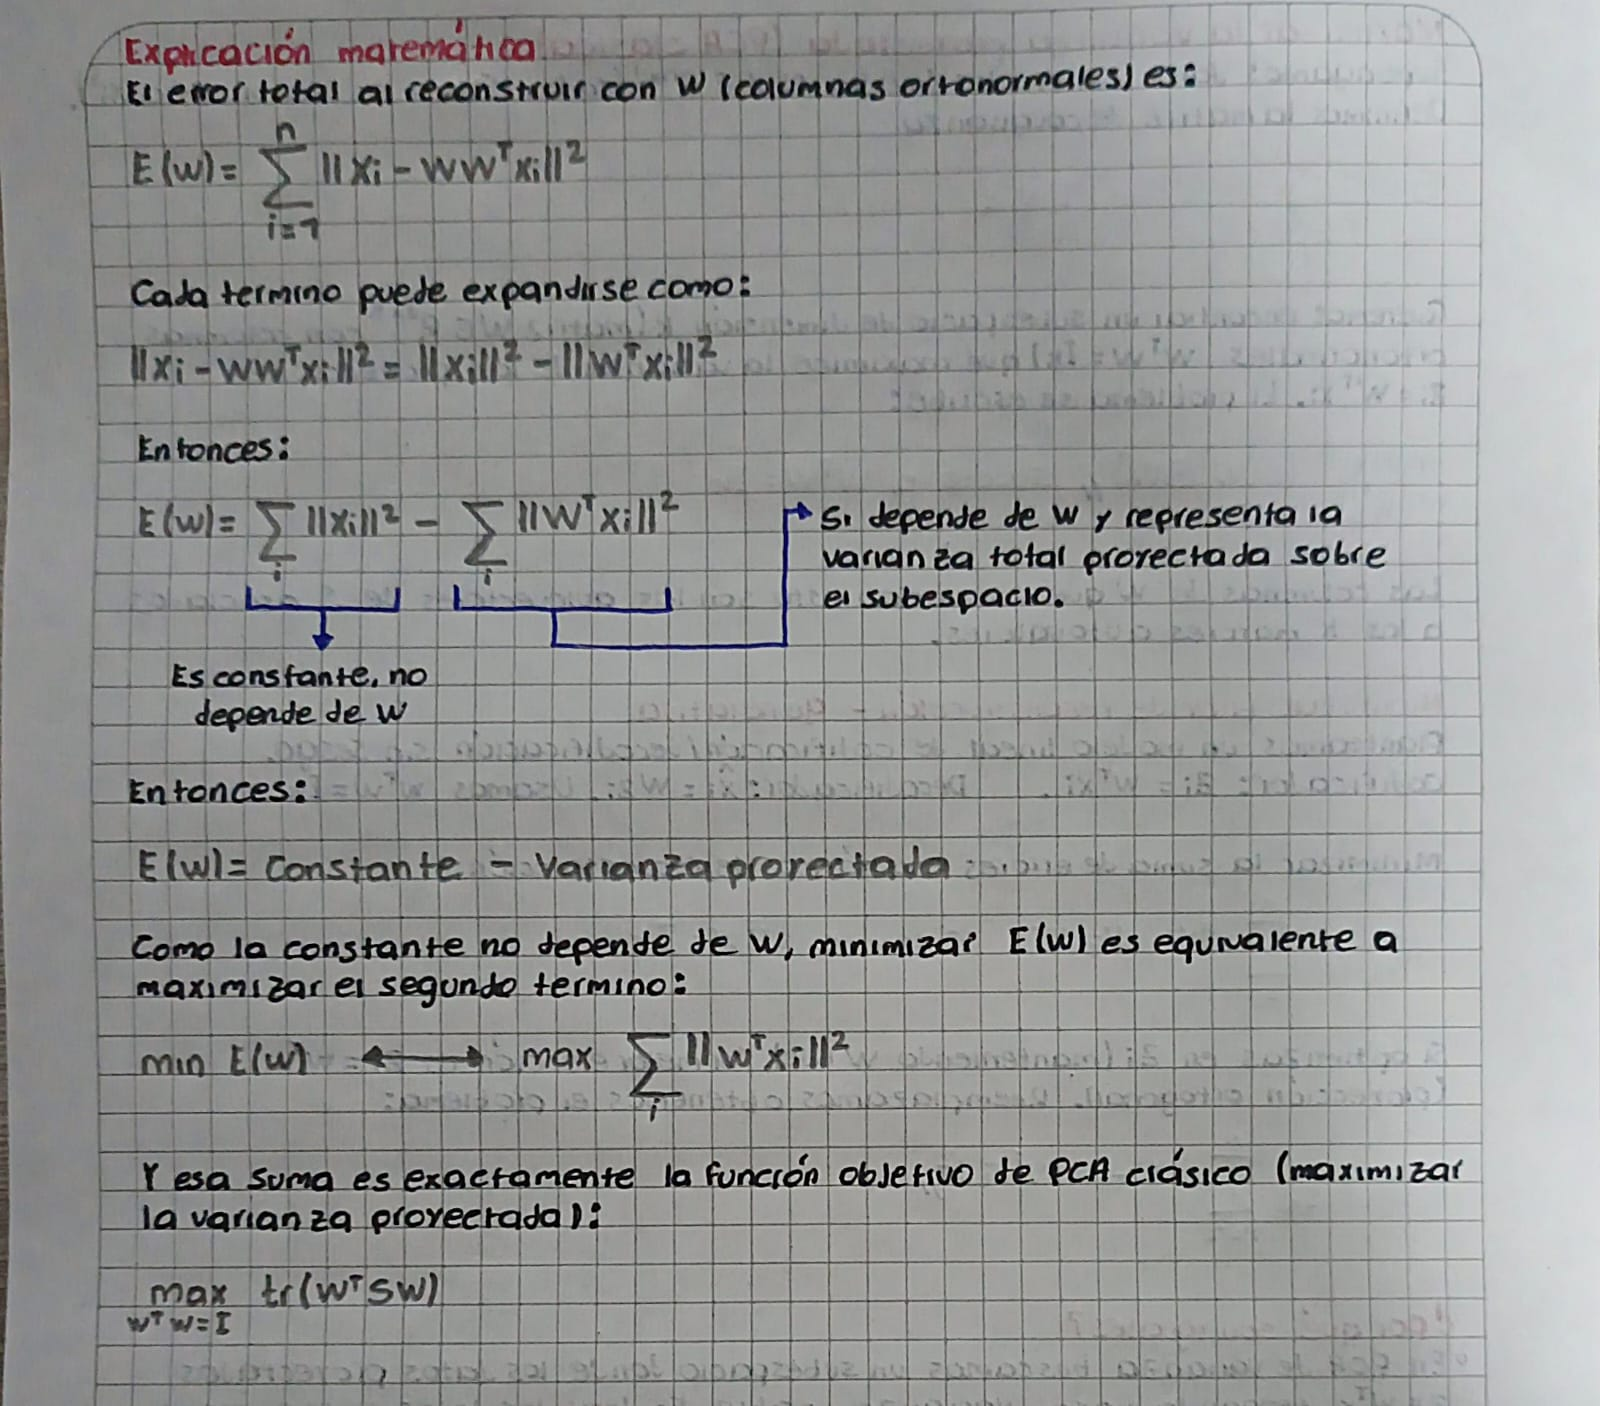

# Ejercicio 2

- Presente un paralelo entre el problema de optimización de PCA y el de Kernel PCA.


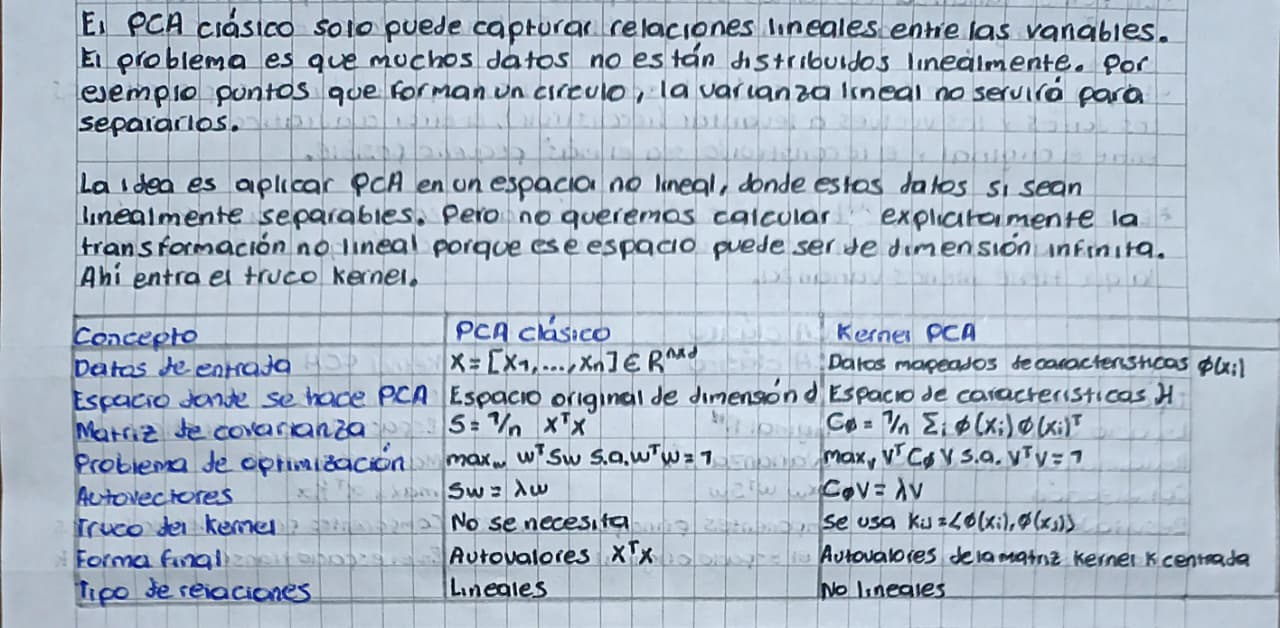

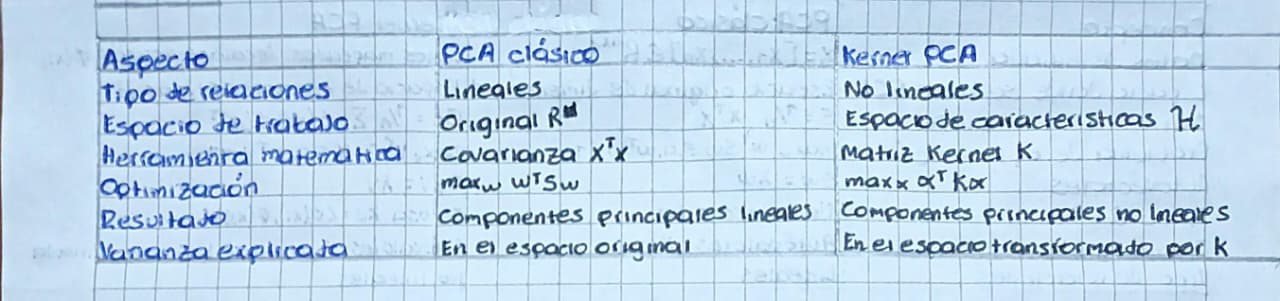

# Ejercicio 3



1.  Consulte en que consiste el algoritmo [eigenfaces](https://direct.mit.edu/jocn/article/3/1/71/3025/Eigenfaces-for-Recognition). Compare el modelo de eigenfaces para reducción de dimensión con el algoritmo PCA. Aplique eigenfaces a Mnist sobre el conjunto `X_train` y grafique las dos primeras dimensiones con las imagenes originales sobre cada punto proyectado, y presente las cinco primeras "eigenfaces" en dibujo tipo imagen.




### Eigenfaces:
Eigenfaces es simplemente PCA aplicado a imágenes de caras.

* Se trata cada imagen como un vector (p. ej. 28×28 → vector de 784).

* Se centra el conjunto (restar la mean face).

* Se calcula la base principal (autovectores) de la matriz de covarianza —esas componentes principales, reinterpretadas como imágenes, se llaman eigenfaces (cada una parece una “cara base”).

* Para reconocimiento o compresión se proyectan las imágenes sobre los k eigenfaces (coeficientes). La reconstrucción desde esos coeficientes se obtiene con la combinación lineal de eigenfaces más la media.

### Eigenfaces VS PCA:
| Aspecto               | Eigenfaces                                              | PCA                                           |
| --------------------- | ------------------------------------------------------- | --------------------------------------------- |
| **Origen**            | Aplicación de PCA a imágenes (rostros)                  | Algoritmo general de reducción de dimensión   |
| **Entrada**           | Imágenes representadas como vectores (pixeles)          | Datos numéricos de cualquier tipo             |
| **Objetivo**          | Capturar las variaciones más importantes entre imágenes | Capturar direcciones de máxima varianza       |
| **Salida**            | Eigenfaces (autovectores reestructurados como imágenes) | Componentes principales                       |
| **Aplicación típica** | Reconocimiento facial, compresión de imágenes           | Cualquier análisis de datos de alta dimensión

In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist #cargar fashion mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape(X_train.shape[0], -1)/255.
y = y_train

print(X.shape,y.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 784) (60000,)


In [2]:
#se submuestrea para facilidad en cálculos
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.98,random_state=123)
print(X_train.shape,y_train.shape)

(1200, 784) (1200,)


In [3]:
#Ayuda de código
red = PCA(n_components=0.9)
Z = red.fit_transform(X_train)


In [4]:
#graficar 2D con imágenes originales
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#img_w y img_h representan la resolución original de los datos
def plot_mnist_2d(Z,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

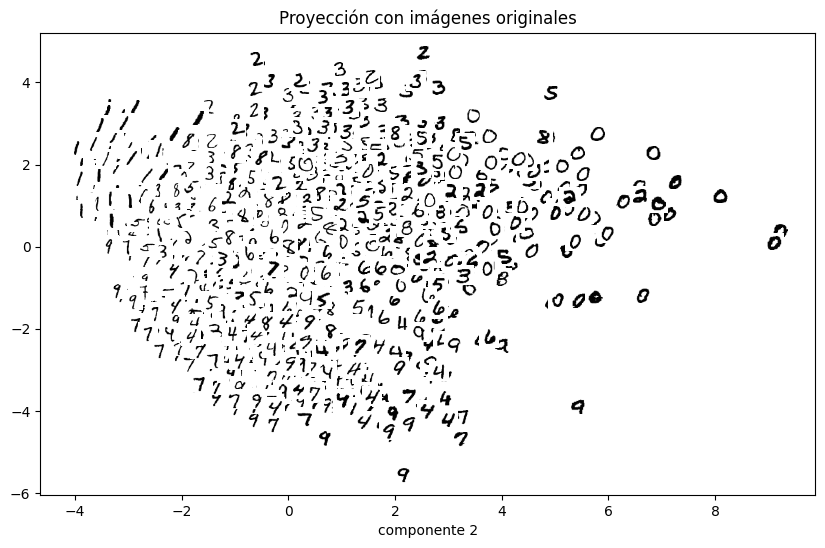

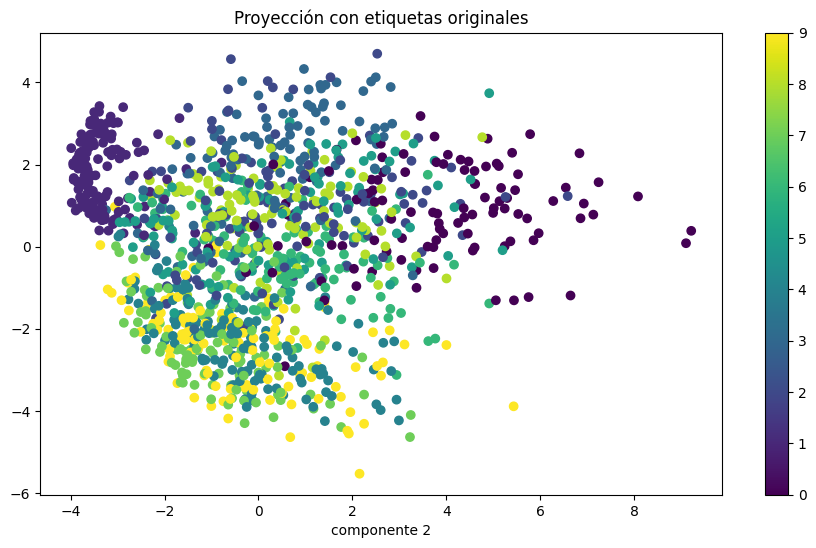

In [5]:
plot_mnist_2d(Z,X_train,img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con imágenes originales')
plt.show()

plt.figure(figsize=(11,6))
plt.scatter(Z[:,0],Z[:,1],c=y_train)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con etiquetas originales')
plt.colorbar()
plt.show()

In [6]:
#graficar componentes como "eigenfaces"
print(red.components_.shape)


(80, 784)


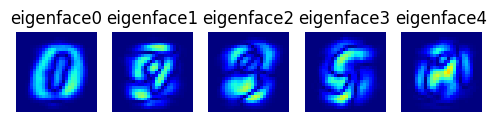

In [7]:
n_rows = 1
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
#resolución imagenes
img_w = 28
img_h = 28

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(abs(red.components_[index].reshape(img_w,img_h)),
                    vmin=abs(red.components_).min(), vmax=abs(red.components_).max(),cmap="jet", interpolation="nearest")
        plt.axis('off')
        plt.title("eigenface" + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

2. Utilizando la base de datos muestreada Mnist en `X_train` y `y_train`, realice una análisis comparativo en términos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los métodos: PCA, kernel PCA rbf, t-SNE y UMAP. Utilice la librería [RAPIDS](https://rapids.ai/) a la hora de implementar los algoritmos, en caso de estar disponibles.

In [8]:
!pip -q install cudf-cu12 cuml-cu12 --extra-index-url=https://pypi.nvidia.com # Instalamos RAPIDS

In [9]:
!pip install umap-learn

cuML disponible; intentaré usar RAPIDS cuML donde sea posible.

=== Método: PCA ===
PCA: silhouette=0.3574, time=1.11s

=== Método: KernelPCA_RBF ===
KernelPCA_RBF: silhouette=0.3552, time=0.15s

=== Método: t-SNE ===
t-SNE repeat 0: silhouette=0.4327, time=0.7s
t-SNE repeat 1: silhouette=0.3778, time=0.1s
t-SNE repeat 2: silhouette=0.3706, time=0.0s

=== Método: UMAP ===
[2025-10-26 03:34:26.860] [CUML] [info] build_algo set to brute_force_knn because random_state is given
UMAP: silhouette=0.4957, time=0.51s

Resumen de silueta (k=10):
PCA           silhouette = 0.35735842650351357
KernelPCA_RBF  silhouette = 0.3552394195106047
t-SNE         silhouette = 0.3937259018421173
UMAP          silhouette = 0.4956701099872589


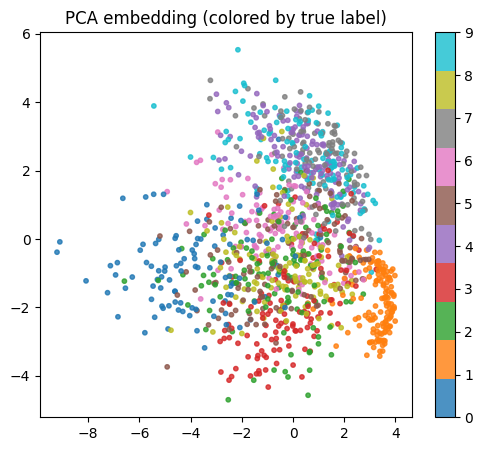

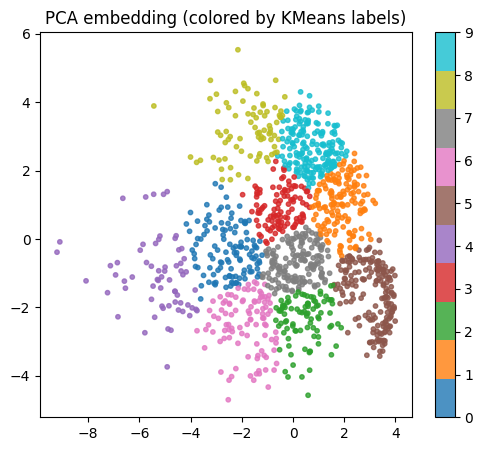

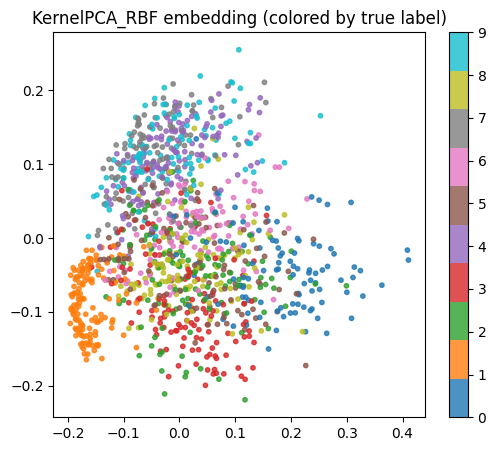

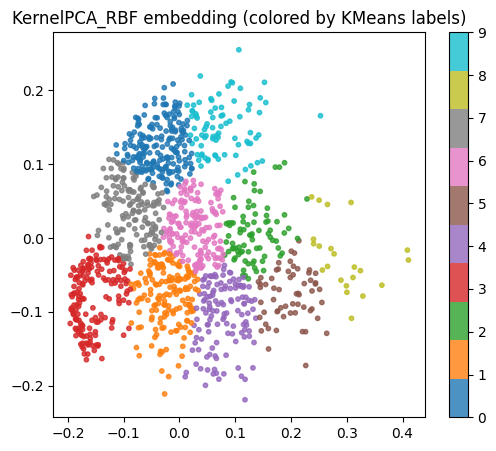

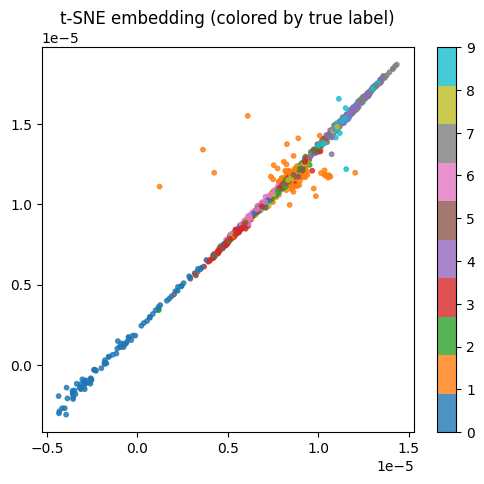

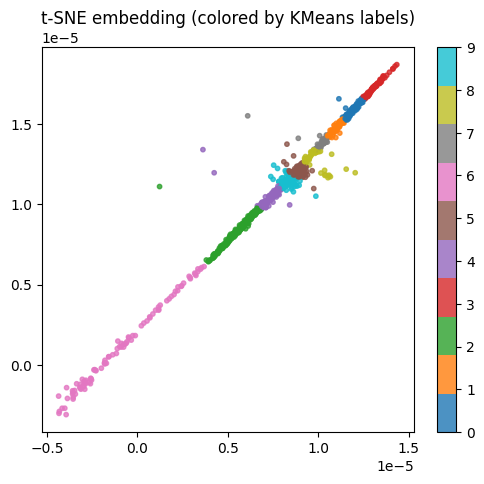

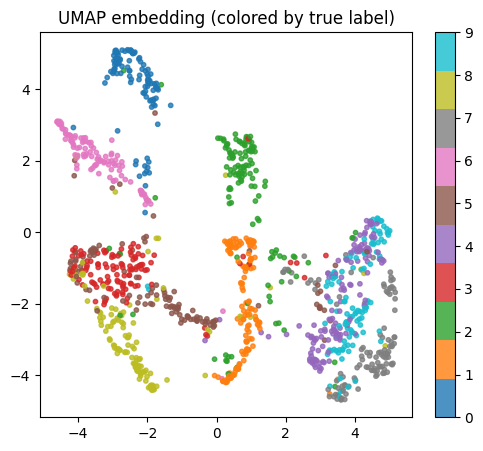

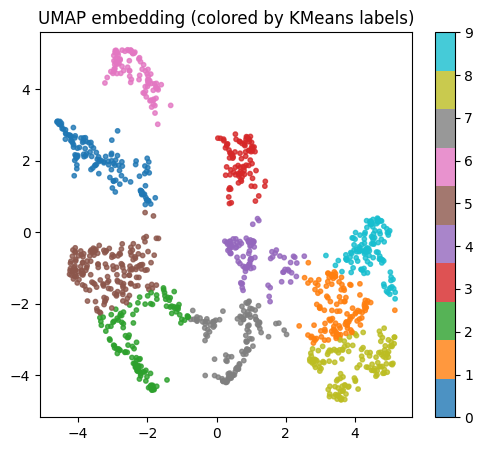

In [10]:
# -------------------------
# Comparativa: PCA, KernelPCA (RBF), t-SNE, UMAP + KMeans + Silhouette
# -------------------------
import time
import numpy as np
import matplotlib.pyplot as plt

# tu X_train y y_train ya submuestreados (n_samples x n_features)
# asegúrate de que X_train esté en float (0..1)
# X_train, y_train = ...

# ---- intentamos usar RAPIDS (cuML) si está disponible ----
use_rapids = False
try:
    import cuml
    from cuml.decomposition import PCA as cuPCA
    from cuml.cluster import KMeans as cuKMeans
    # cuML also has UMAP and TSNE in newer releases; we'll try to import them below
    try:
        from cuml.manifold import TSNE as cuTSNE
        from cuml.manifold import UMAP as cuUMAP
    except Exception:
        cuTSNE = None
        cuUMAP = None
    print("cuML disponible; intentaré usar RAPIDS cuML donde sea posible.")
    use_rapids = True
except Exception as e:
    print("cuML no disponible o no se pudo importar (usaremos sklearn/umap).", str(e))
    use_rapids = False

# ---- imports CPU fallback ----
from sklearn.decomposition import PCA as skPCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE as skTSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
try:
    import umap
    UMAP = umap.UMAP
except Exception:
    # fallback to umap-learn import name
    from umap import UMAP

# ---- helper: compute embedding 2D per method ----
def embed_pca(X, n_components=2):
    if use_rapids:
        p = cuPCA(n_components=n_components)
        Xr = p.fit_transform(X)  # cuML accepts numpy/cudf, returns GPU array (cudf/cupy)
        try:
            # move to host if necessary
            Xr = Xr.get()  # if it's a cupy array, else leave
        except Exception:
            try:
                import cupy as cp
                Xr = cp.asnumpy(Xr)
            except Exception:
                pass
        return np.asarray(Xr)
    else:
        p = skPCA(n_components=n_components, random_state=0)
        return p.fit_transform(X)

def embed_kernel_pca_rbf(X, n_components=2, gamma=None):
    # cuML currently has limited kernel-pca; use sklearn KernelPCA (CPU)
    if gamma is None:
        gamma = 1.0 / X.shape[1]
    kp = KernelPCA(n_components=n_components, kernel='rbf', gamma=gamma, random_state=0, fit_inverse_transform=False)
    return kp.fit_transform(X)

def embed_tsne(X, n_components=2, perplexity=30, random_state=0):
    if use_rapids and ('cuTSNE' in globals() and cuTSNE is not None):
        t0 = time.time()
        model = cuTSNE(n_components=n_components, perplexity=perplexity, random_state=random_state)
        Xr = model.fit_transform(X)
        try:
            Xr = Xr.get()
        except Exception:
            pass
        return np.asarray(Xr)
    else:
        model = skTSNE(n_components=n_components, perplexity=perplexity, random_state=random_state, init='pca', learning_rate='auto')
        return model.fit_transform(X)

def embed_umap(X, n_components=2, n_neighbors=15, min_dist=0.1, random_state=0):
    if use_rapids and ('cuUMAP' in globals() and cuUMAP is not None):
        model = cuUMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, random_state=random_state)
        Xr = model.fit_transform(X)
        try:
            Xr = Xr.get()
        except Exception:
            pass
        return np.asarray(Xr)
    else:
        model = UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, random_state=random_state)
        return model.fit_transform(X)

# ---- clustering and silhouette evaluation ----
def kmeans_and_silhouette(embedding, k=10, use_cuml=False):
    if use_rapids and use_cuml:
        km = cuKMeans(n_clusters=k, random_state=0)
        labels = km.fit_predict(embedding)
        try:
            labels = labels.get()
        except Exception:
            pass
    else:
        km = KMeans(n_clusters=k, random_state=0, n_init=10)
        labels = km.fit_predict(embedding)
    # silhouette requires at least 2 clusters and fewer clusters than samples
    if len(np.unique(labels)) > 1 and embedding.shape[0] > len(np.unique(labels)):
        s = silhouette_score(embedding, labels)
    else:
        s = np.nan
    return labels, s

# ---- run experiments ----
methods = {
    'PCA': lambda X: embed_pca(X, n_components=2),
    'KernelPCA_RBF': lambda X: embed_kernel_pca_rbf(X, n_components=2, gamma=1.0/X.shape[1]),
    't-SNE': lambda X, rs=0: embed_tsne(X, n_components=2, perplexity=30, random_state=rs),
    'UMAP': lambda X: embed_umap(X, n_components=2, n_neighbors=15, min_dist=0.1, random_state=0)
}

k_list = [10]  # puedes añadir más valores como [5,8,10,12,15]
results = []

# If X_train is GPU array (cudf/cupy), convert to numpy for sklearn fallbacks
X_work = X_train.copy()

# Run PCA, KernelPCA, UMAP once; run t-SNE a few times to average
for name, fn in methods.items():
    print(f"\n=== Método: {name} ===")
    if name == 't-SNE':
        n_repeats_tsne = 3
        sils = []
        embeddings = []
        for r in range(n_repeats_tsne):
            t0 = time.time()
            emb = fn(X_work, rs=r)
            t_elapsed = time.time() - t0
            embeddings.append(emb)
            _, s = kmeans_and_silhouette(emb, k=k_list[0], use_cuml=use_rapids)
            sils.append(s)
            print(f"t-SNE repeat {r}: silhouette={s:.4f}, time={t_elapsed:.1f}s")
        sil_mean = np.nanmean(sils)
        results.append((name, {'silhouette_mean': sil_mean, 'silhouette_runs': sils, 'embedding': embeddings[0]}))
    else:
        t0 = time.time()
        emb = fn(X_work)
        t_elapsed = time.time() - t0
        _, s = kmeans_and_silhouette(emb, k=k_list[0], use_cuml=use_rapids)
        print(f"{name}: silhouette={s:.4f}, time={t_elapsed:.2f}s")
        results.append((name, {'silhouette': s, 'embedding': emb}))

# ---- print summary table ----
print("\nResumen de silueta (k=10):")
for item in results:
    name, info = item
    sil = info.get('silhouette', info.get('silhouette_mean', None))
    print(f"{name:12s}  silhouette = {sil}")

# ---- plot embeddings (real labels and KMeans labels) for each method ----
def plot_embedding(emb, labels_true, title):
    plt.figure(figsize=(6,5))
    sc = plt.scatter(emb[:,0], emb[:,1], c=labels_true, cmap='tab10', s=10, alpha=0.8)
    plt.title(title)
    plt.colorbar(sc, ticks=range(10))
    plt.show()

for name, info in results:
    emb = info['embedding'] if name != 't-SNE' else info['embedding']  # use first repeat embedding
    plot_embedding(emb, y_train, f"{name} embedding (colored by true label)")
    # also show clusters from KMeans
    labels_km, _ = kmeans_and_silhouette(emb, k=k_list[0], use_cuml=use_rapids)
    plot_embedding(emb, labels_km, f"{name} embedding (colored by KMeans labels)")


1. PCA y Kernel PCA:

* Son métodos lineales (PCA totalmente, Kernel PCA parcialmente), por lo que no logran separar bien los datos de MNIST, que tienen fronteras no lineales complejas.

* Los valores de silueta son bajos (~0.35), lo que confirma una pobre separación.

2. t-SNE:

* Es no lineal y se especializa en preservar la vecindad local, lo que mejora la separación visual.

* Los clusters se alinean en una estructura ordenada (a veces tipo “línea creciente”), lo que es común en t-SNE.

* La métrica de silueta mejora (~0.39).

3. UMAP

* También no lineal, pero más eficiente y con mejor preservación global.

* Logra una separación clara entre los dígitos, con espacios bien definidos entre clusters.

* Es el que muestra el mayor coeficiente de silueta (≈0.50), confirmando su superioridad en esta tarea.